## Assignment 4 - Text Analysis

이번 과제에서는 주어진 텍스트를 분석하여 워드클라우드 그래프를 그린다.

* 파일 이름: A4-학번-이름(영어로).iphynb 형식으로 (예: A4-13403-999-jiyoon.iphynb)

### Dataset

주어진 데이터는 네이버에서 크롤링한 영화평이다.

데이터는 다음과 같이 구성되어 있다.

```
id	document	label
2190435	사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화	1
9279041	완전 감동입니다 다시봐도 감동	1
7865729	개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음	1
...
9327892	타임 루프 소재중 거의 최악. 감독과 작가부터 자기 반성의 시간을 갖자	0
9953525	이쪽 저쪽 ...어디서 본듯한...내용이 뒤죽박죽 순수창작물인지?	0
7744648	전기세가 아까운 영화!	0
```

데이터를 보면 알 수 있듯이 긍정적인 평은 label이 1,
부정적인 평은 label 이 0이다.



### Q1: 긍정적인 리뷰를 선별하고 random 하게 리뷰 1000개를 선택한 후 형용사의 wordcloud를 그리시오

In [1]:
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from wordcloud import WordCloud
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('naver_ratings.txt',delimiter="\t", names = ['id','document','label'])
df = df.drop([0])
print(df.head())

         id                                           document label
1   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ     1
2   8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...     1
3   4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.     1
4   9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...     1
5  10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.     1


In [3]:
df1 = df[df["label"]=='1']
df1_rand = df1.sample(n=1000, random_state=1)
df1_rand.head()

,id,document,label
43661,3500185,지금이야 별로라고 생각 하겠지만 그떈 정말 재밌었음,1
87279,10275707,엔딩이 너무좋았음. 흔한 클리셰가 아니라 예측하기도 어렵고 진짜 좋았음 ㅠㅠ,1
14318,9580203,우리는 늘 곁에서 죽음을 경계하고 있다. 억누르려다가 끝내 분출해 흘려나오는 영화.,1
81933,10030112,그래서 키리시마가 대체 어떻게 생긴놈이냐.,1
95322,8647563,이젠 이의 아류작들이 범람할뿐,1


In [4]:
tagger=Komoran()
for i in range(1000):
    df1_rand.iloc[i,1] = tagger.pos(df1_rand.iloc[i,1])
df1_rand.head()


/Users/bell92/anaconda3/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


,id,document,label
43661,3500185,"[(지금, NNG), (이야, JX), (별로, MAG), (이, VCP), (라고...",1
87279,10275707,"[(엔, NNG), (딩, MAG), (이, JKS), (너무, MAG), (좋, ...",1
14318,9580203,"[(우리, NP), (는, JX), (늘, MAG), (곁, NNG), (에서, J...",1
81933,10030112,"[(그래서, MAJ), (키리시, NNP), (마가, NNP), (대체, NNG),...",1
95322,8647563,"[(이제, NNG), (ㄴ, JX), (이, NP), (의, JKG), (아, NN...",1


In [5]:
adj_list = []
for i in range(1000):
    for word, tag in df1_rand.iloc[i,1]:
        if tag in ['VA']:
            adj_list.append(word)
    

In [6]:
adj_counts = Counter(adj_list)

In [7]:
cloud = WordCloud(width=900, height=600, 
                  font_path='NanumSquareOTFBold.otf',
                  background_color='white')
cloud = cloud.fit_words(adj_counts)


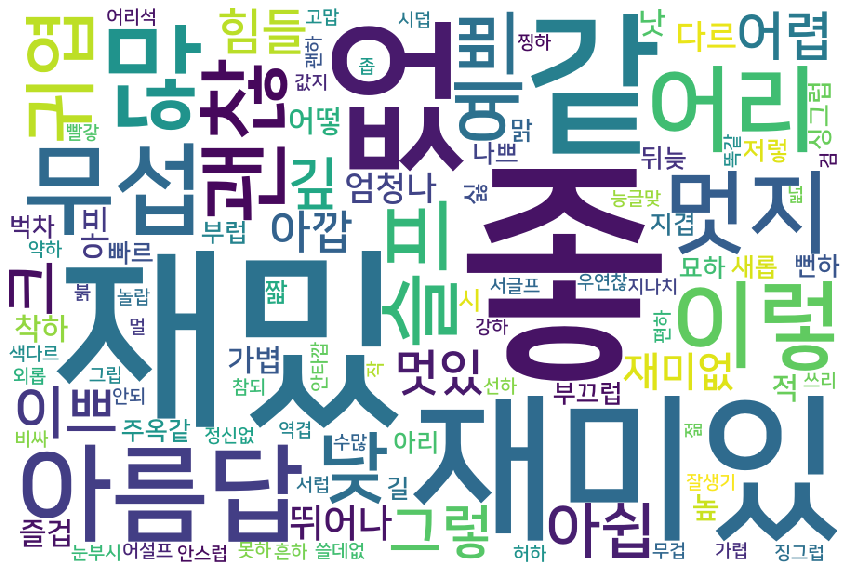

In [8]:
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### Q2: 부정적인 리뷰를 선별하고 random 하게 리뷰 1000개를 선택한 후 형용사의 wordcloud를 그리시오

In [9]:
df2 = df[df["label"]=='0']
df2_rand = df2.sample(n=1000, random_state=1)
df2_rand.head()

,id,document,label
143661,271256,생각보다 재미 없음,0
187279,9963008,비싼돈으로 극장서 봤는데 티비에서 똑같은걸 방송하네요 기분나빠요,0
114318,8587016,맷돼지 CG보다 끔찍했던 줄거리.,0
181933,9381605,감동적이지만 너무 보기에 거북했었다,0
195322,8618572,이걸 영화라고 찍으셨나? 이러니 한국영화가 욕 먹지...에혀,0


In [10]:
for i in range(1000):
    df2_rand.iloc[i,1] = tagger.pos(df2_rand.iloc[i,1])
df2_rand.head()

,id,document,label
143661,271256,"[(생각, NNG), (보다, JKB), (재미, NNP), (없, VA), (음,...",0
187279,9963008,"[(비싸, VA), (ㄴ, ETM), (돈, NNG), (으로, JKB), (극장,...",0
114318,8587016,"[(매, VV), (엇, EP), (돼지, NNG), (CG, SL), (보다, J...",0
181933,9381605,"[(감동, NNG), (적, XSN), (이, VCP), (지만, EC), (너무,...",0
195322,8618572,"[(이거, NP), (ㄹ, JKO), (영화, NNG), (이, VCP), (라고,...",0


In [11]:
adj_list2 = []
for i in range(1000):
    for word, tag in df2_rand.iloc[i,1]:
        if tag in ['VA']:
            adj_list2.append(word)

In [12]:
adj_counts2 = Counter(adj_list2)

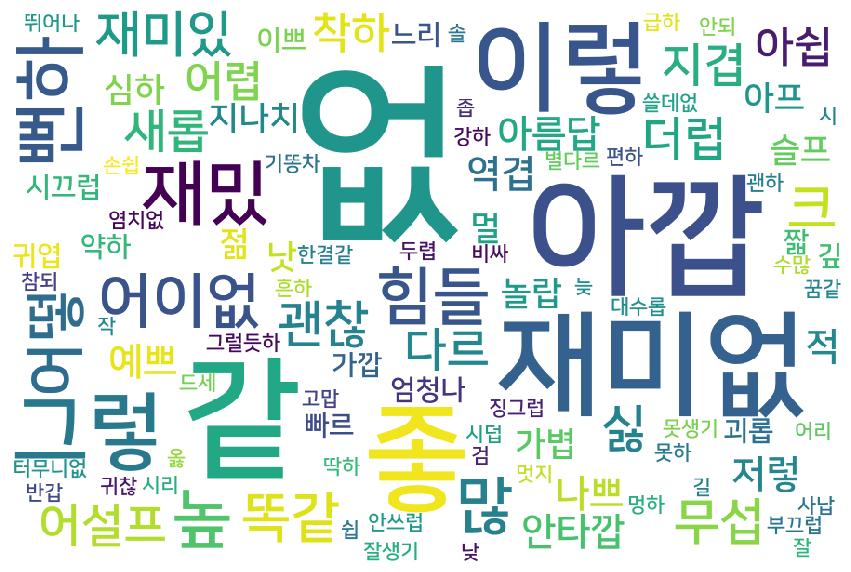

In [13]:
cloud = WordCloud(width=900, height=600, 
                  font_path='NanumSquareOTFBold.otf',
                  background_color='white')
cloud = cloud.fit_words(adj_counts2)
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(cloud)
plt.show()